In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

# Dataset

In [36]:
data = pd.read_csv("./findata-creditscoring/credit_train.csv")
test = pd.read_csv("./findata-creditscoring/credit_test.csv")

In [37]:
#from google.colab import drive
#drive.mount('/content/drive')

In [38]:
test_id = test['Loan ID']

In [39]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [40]:
data.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [41]:
data.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

# Дубликаты

In [42]:
print(data.duplicated())
data.drop_duplicates(['Loan ID'], inplace=True)

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool


In [43]:
data = data.drop(['Loan ID',	'Customer ID'], axis=1)
test = test.drop(['Loan ID',	'Customer ID'], axis=1)
data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,Fully Paid,99999999,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9,0,37392,134442.0,0.0,0.0
99996,Fully Paid,99999999,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22,0,153045,509234.0,0.0,0.0
99997,Fully Paid,103136,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12,1,109554,537548.0,1.0,0.0
99998,Fully Paid,530332,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8,0,404225,738254.0,0.0,0.0


In [44]:
len(data)

81999

In [45]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
test.columns = test.columns.str.lower().str.replace(' ', '_')
data.head(1)

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0


In [46]:
# Пропуски
data.isnull().sum()

loan_status                         0
current_loan_amount                 0
term                                0
credit_score                    17031
annual_income                   17031
years_in_current_job             3508
home_ownership                      0
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent    44621
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 2
bankruptcies                      175
tax_liens                           8
dtype: int64

# Таблица корреляций

In [48]:
# Таблица корреляций
#print(data.columns)
# Example: Converting a categorical column to numeric
#mapping = {'Fully Paid': 1, 'Not Paid': 0}
#data['loan_status'] = data['loan_status'].replace(mapping)
data.corr(numeric_only=True)

,current_loan_amount,credit_score,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
current_loan_amount,1.000000,-0.112114,0.017206,-0.007167,0.023086,0.008841,0.002717,-0.004120,0.005100,-0.001345,-0.000458,-0.003723
credit_score,-0.112114,1.000000,-0.017946,0.002078,-0.015448,-0.006364,0.008413,0.000770,0.001012,-0.003968,-0.004274,0.007138
annual_income,0.017206,-0.017946,1.000000,0.464094,0.151250,-0.077464,0.139969,-0.013750,0.295324,0.045918,-0.046013,0.042069
monthly_debt,-0.007167,0.002078,0.464094,1.000000,0.191809,-0.055528,0.407482,-0.052575,0.475176,0.035493,-0.078908,0.022957
years_of_credit_history,0.023086,-0.015448,0.151250,0.191809,1.000000,-0.042918,0.128325,0.061412,0.206142,0.030353,0.064979,0.019053
months_since_last_delinquent,0.008841,-0.006364,-0.077464,-0.055528,-0.042918,1.000000,-0.033945,0.098571,-0.029011,-0.008755,0.119380,0.009529
number_of_open_accounts,0.002717,0.008413,0.139969,0.407482,0.128325,-0.033945,1.000000,-0.014269,0.226051,0.029132,-0.025683,0.007286
number_of_credit_problems,-0.004120,0.000770,-0.013750,-0.052575,0.061412,0.098571,-0.014269,1.000000,-0.108873,-0.011704,0.753123,0.582823
current_credit_balance,0.005100,0.001012,0.295324,0.475176,0.206142,-0.029011,0.226051,-0.108873,1.000000,0.131504,-0.120339,-0.013182
maximum_open_credit,-0.001345,-0.003968,0.045918,0.035493,0.030353,-0.008755,0.029132,-0.011704,0.131504,1.000000,-0.014034,-0.001481


<Axes: >

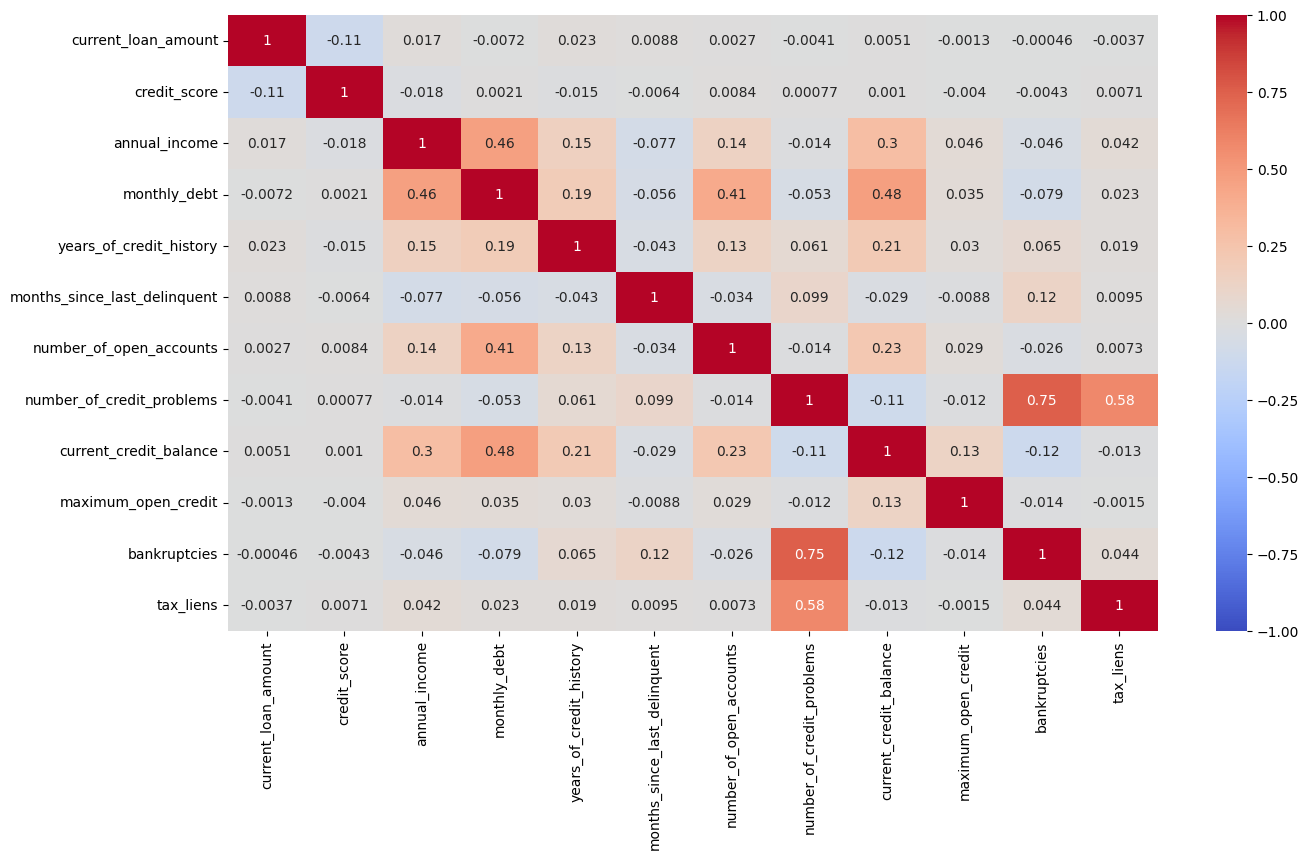

In [50]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(numeric_only=True), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

# Непрерывные переменные

In [51]:
data.describe()

,current_loan_amount,credit_score,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,8.199900e+04,64968.000000,6.496800e+04,81999.000000,81999.000000,37378.000000,81999.000000,81999.000000,8.199900e+04,8.199700e+04,81824.000000,81991.000000
mean,1.208640e+07,1168.410741,1.376776e+06,18330.633110,18.296783,35.064236,11.114489,0.161441,2.936203e+05,7.935358e+05,0.113463,0.028064
std,3.217953e+07,1632.676553,1.121542e+06,12127.700801,7.043774,22.021222,4.981266,0.473148,3.726145e+05,9.208747e+06,0.344674,0.254642
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.792560e+05,711.000000,8.473050e+05,10117.595000,13.500000,16.000000,8.000000,0.000000,1.133160e+05,2.804560e+05,0.000000,0.000000
50%,3.077800e+05,731.000000,1.169592e+06,16075.330000,17.000000,32.000000,10.000000,0.000000,2.099310e+05,4.777740e+05,0.000000,0.000000
75%,5.194530e+05,743.000000,1.649438e+06,23811.370000,21.800000,51.000000,14.000000,0.000000,3.669945e+05,7.984900e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


# Категориальные данные

In [52]:
le = preprocessing.LabelEncoder()

In [53]:
data['loan_status'].value_counts(dropna=False)

loan_status
Fully Paid     59360
Charged Off    22639
Name: count, dtype: int64

In [54]:
data['term'].value_counts(dropna=False)

term
Short Term    61387
Long Term     20612
Name: count, dtype: int64

In [55]:
data['years_in_current_job'].value_counts(dropna=False)

years_in_current_job
10+ years    25271
2 years       7560
< 1 year      6755
3 years       6671
5 years       5619
1 year        5317
4 years       5029
6 years       4702
7 years       4566
8 years       3781
NaN           3508
9 years       3220
Name: count, dtype: int64

In [56]:
data['home_ownership'].value_counts(dropna=False)

home_ownership
Home Mortgage    39879
Rent             34499
Own Home          7458
HaveMortgage       163
Name: count, dtype: int64

In [57]:
data['purpose'].value_counts(dropna=False)

purpose
Debt Consolidation      64907
Home Improvements        4795
other                    4604
Other                    2634
Business Loan            1229
Buy a Car                1081
Medical Bills             880
Buy House                 519
Take a Trip               435
major_purchase            303
small_business            230
moving                    116
wedding                    93
Educational Expenses       85
vacation                   80
renewable_energy            8
Name: count, dtype: int64

In [58]:
data['loan_status'] = le.fit_transform(data['loan_status'])
data['term'] = le.fit_transform(data['term'])
data['years_in_current_job'] = le.fit_transform(data['years_in_current_job'])
data['home_ownership'] = le.fit_transform(data['home_ownership'])
data['purpose'] = le.fit_transform(data['purpose'])

data.head(3)

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,1,445412,1,709.0,1167493.0,8,1,5,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,1,262328,1,NaN,NaN,1,1,3,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,1,99999999,1,741.0,2231892.0,8,2,3,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0


In [59]:
test['term'] = le.fit_transform(test['term'])
test['years_in_current_job'] = le.fit_transform(test['years_in_current_job'])
test['home_ownership'] = le.fit_transform(test['home_ownership'])
test['purpose'] = le.fit_transform(test['purpose'])

# Пропуски

In [60]:
data.isna().sum()

loan_status                         0
current_loan_amount                 0
term                                0
credit_score                    17031
annual_income                   17031
years_in_current_job                0
home_ownership                      0
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent    44621
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 2
bankruptcies                      175
tax_liens                           8
dtype: int64

In [61]:
data['credit_score'].fillna(data['credit_score'].median(), inplace=True)
data['annual_income'].fillna(data['annual_income'].mean(), inplace=True)
data['months_since_last_delinquent'].fillna(data['months_since_last_delinquent'].mean(), inplace=True)
data['maximum_open_credit'].fillna(data['maximum_open_credit'].median(), inplace=True)
data['bankruptcies'].fillna(data['bankruptcies'].mean(), inplace=True)
data['tax_liens'].fillna(data['tax_liens'].median(), inplace=True)

data.isnull().sum()

loan_status                     0
current_loan_amount             0
term                            0
credit_score                    0
annual_income                   0
years_in_current_job            0
home_ownership                  0
purpose                         0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

In [62]:
test['credit_score'].fillna(test['credit_score'].median(), inplace=True)
test['annual_income'].fillna(test['annual_income'].mean(), inplace=True)
test['months_since_last_delinquent'].fillna(test['months_since_last_delinquent'].mean(), inplace=True)
test['maximum_open_credit'].fillna(test['maximum_open_credit'].median(), inplace=True)
test['bankruptcies'].fillna(test['bankruptcies'].mean(), inplace=True)
test['tax_liens'].fillna(test['tax_liens'].median(), inplace=True)

In [63]:
data.head(3)

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,1,445412,1,709.0,1.167493e+06,8,1,5,5214.74,17.2,35.064236,6,1,228190,416746.0,1.0,0.0
1,1,262328,1,731.0,1.376776e+06,1,1,3,33295.98,21.1,8.000000,35,0,229976,850784.0,0.0,0.0
2,1,99999999,1,741.0,2.231892e+06,8,2,3,29200.53,14.9,29.000000,18,1,297996,750090.0,0.0,0.0


# Оценка важности признаков

In [64]:
# Разбиение
from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [65]:
X_train.shape

(57399, 16)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
feat_labels = data.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [68]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [69]:
importances = forest.feature_importances_
indices=np.argsort(importances)[::-1]

 1) credit_score                   0.208720
 2) current_loan_amount            0.131713
 3) maximum_open_credit            0.092406
 4) monthly_debt                   0.091183
 5) current_credit_balance         0.089994
 6) years_of_credit_history        0.083816
 7) annual_income                  0.077574
 8) number_of_open_accounts        0.056941
 9) months_since_last_delinquent   0.050668
10) years_in_current_job           0.044158
11) term                           0.021215
12) purpose                        0.021120
13) home_ownership                 0.012833
14) number_of_credit_problems      0.008396
15) bankruptcies                   0.006512
16) tax_liens                      0.002751


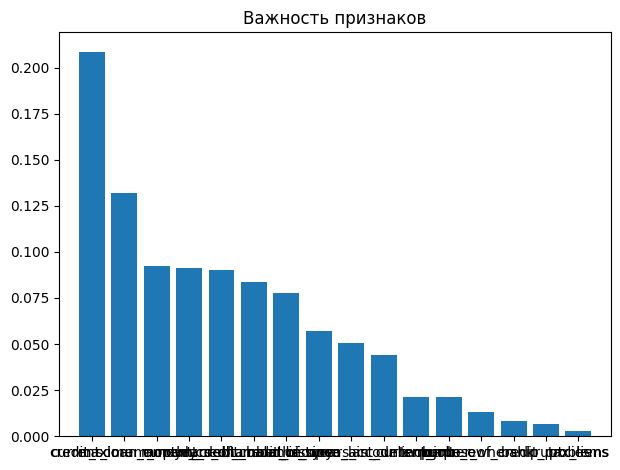

In [70]:
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30,
                       feat_labels[indices[f]],
                       importances[indices[f]]))
plt.title('Важность признаков')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation = 0)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [71]:
data = data.drop(['bankruptcies', 'tax_liens'], axis=1)
test = test.drop(['bankruptcies', 'tax_liens'], axis=1)
data

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit
0,1,445412,1,709.0,1.167493e+06,8,1,5,5214.74,17.2,35.064236,6,1,228190,416746.0
1,1,262328,1,731.0,1.376776e+06,1,1,3,33295.98,21.1,8.000000,35,0,229976,850784.0
2,1,99999999,1,741.0,2.231892e+06,8,2,3,29200.53,14.9,29.000000,18,1,297996,750090.0
3,1,347666,0,721.0,8.069490e+05,3,2,3,8741.90,12.0,35.064236,9,0,256329,386958.0
4,1,176220,1,731.0,1.376776e+06,5,3,3,20639.70,6.1,35.064236,15,0,253460,427174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,1,99999999,1,742.0,1.190046e+06,10,3,11,11969.81,20.1,16.000000,9,0,37392,134442.0
99996,1,99999999,1,732.0,1.289416e+06,0,3,3,13109.05,9.4,21.000000,22,0,153045,509234.0
99997,1,103136,1,742.0,1.150545e+06,6,3,3,7315.57,18.8,18.000000,12,1,109554,537548.0
99998,1,530332,1,746.0,1.717524e+06,9,3,3,9890.07,15.0,35.064236,8,0,404225,738254.0


# Разбиение

In [72]:
# Разбиение
from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [73]:
X_train.shape

(57399, 14)

# Масштабирование

In [76]:
# Нормализация MinMax
#from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
#X_train_norm = mms.fit_transform(X_train)
#X_test_norm = mms.fit_transform(X_test)

In [77]:
# Стандартизация
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

# Посмотреть RobustScaler

In [78]:
X_test = stdsc.fit_transform(test[:])

In [79]:
data.head()

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit
0,1,445412,1,709.0,1.167493e+06,8,1,5,5214.74,17.2,35.064236,6,1,228190,416746.0
1,1,262328,1,731.0,1.376776e+06,1,1,3,33295.98,21.1,8.000000,35,0,229976,850784.0
2,1,99999999,1,741.0,2.231892e+06,8,2,3,29200.53,14.9,29.000000,18,1,297996,750090.0
3,1,347666,0,721.0,8.069490e+05,3,2,3,8741.90,12.0,35.064236,9,0,256329,386958.0
4,1,176220,1,731.0,1.376776e+06,5,3,3,20639.70,6.1,35.064236,15,0,253460,427174.0


In [80]:
X_test[:5]

array([[-0.34787984,  0.60893507, -0.19622476,  0.90628448, -0.88980805,
        -0.97609905, -0.34326004,  1.90100163,  0.50784661,  0.        ,
        -0.41490073, -0.33039938,  0.85322313,  0.19977379],
       [-0.35878707,  0.60893507, -0.20599602,  0.70712839, -0.88980805,
        -0.97609905, -0.34326004,  1.46739535,  0.16586908,  0.        ,
        -0.01674255, -0.33039938,  1.00178711,  0.1167523 ],
       [-0.3623685 ,  0.60893507, -0.22478689, -0.64016723, -0.59712729,
         1.12213622, -0.34326004, -0.80955477, -0.81731633, -1.68397976,
        -0.21582164, -0.33039938, -0.64974504, -0.16069122],
       [-0.36164859,  0.60893507, -0.21125746, -0.75718425, -0.88980805,
         1.12213622, -0.34326004, -0.13370084, -0.24735378, -0.53725139,
         0.9786529 ,  1.66597152, -0.34468715, -0.0837096 ],
       [-0.35703603,  0.60893507, -0.19847967,  0.5039667 , -0.88980805,
        -0.97609905, -0.34326004,  1.69759881,  1.1063073 ,  0.60947697,
         0.58049472, -0.33

# Обучение модели

In [81]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train_std, y_train)

# Оценка

In [82]:
predictions = clf.predict(X_test_std)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7811382113821138

In [83]:
submission_preds = clf.predict(X_test)
submission_preds
str_res = np.array(['Charged Off', 'Fully Paid'])
res_arr = str_res[submission_preds]
res_arr

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype='<U11')

In [84]:
res = pd.DataFrame({"Loan ID": test_id.values,
                   "Loan Status": res_arr,
                  })
res

,Loan ID,Loan Status
0,f738779f-c726-40dc-92cf-689d73af533d,Fully Paid
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,Fully Paid
2,f7744d01-894b-49c3-8777-fc6431a2cff1,Fully Paid
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,Fully Paid
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,Fully Paid
...,...,...
9995,c4ab66f9-833c-43b8-879c-4f8bcb64dd14,Fully Paid
9996,bbd3a392-01b4-4e0e-9c28-b2a4a39beac7,Fully Paid
9997,da9870de-4280-46a3-8fc6-91cfe5bfde9d,Fully Paid
9998,0cc8e0e0-1bc6-49d7-ad0f-0598b647458f,Fully Paid
